In [1]:
from datetime import datetime, date
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv("datasets/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [14]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn.model_selection import train_test_split

prices = df[df.columns[0:2]]
# prices.reset_index(level=0, inplace=True)
prices["timestamp"] = pd.to_datetime(prices.Date).astype(int)
prices = prices.drop(['Date'],axis=1)
dataset = prices.values
X = dataset[:,1].reshape(-1,1)
Y = dataset[:,0:1]
validation_size = 0.15
seed = 7
X_train,X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

<ipython-input-8-cb664d7b11c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices["timestamp"] = pd.to_datetime(prices.Date).astype(int)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR 

num_folds = 10
seed = 7
scoring = "r2"

models = []
models.append((' LR ', LinearRegression()))
models.append((' LASSO ', Lasso()))
models.append((' EN ', ElasticNet()))
models.append((' KNN ', KNeighborsRegressor()))
models.append((' CART', DecisionTreeRegressor()))
models.append((' SVR', SVR()))

In [10]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

results = []
names = []

for name, model in models: 
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)

  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

 LR : 0.441106 (0.082620)
 LASSO : 0.441106 (0.082620)
 EN : 0.441106 (0.082620)
 KNN : 0.994600 (0.000909)
 CART: 0.993880 (0.001819)


/Users/vonam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30019242008.47952, tolerance: 11122495.924050162
  model = cd_fast.enet_coordinate_descent(
/Users/vonam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29242529716.4189, tolerance: 11048732.411147278
  model = cd_fast.enet_coordinate_descent(
/Users/vonam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30017967724.30309, tolerance: 10958000.01549307
  model = cd_fast.enet_coordinate_descent(
/Users/vonam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mo

 SVR: 0.006423 (0.020693)


/Users/vonam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/vonam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


74084.91027732463


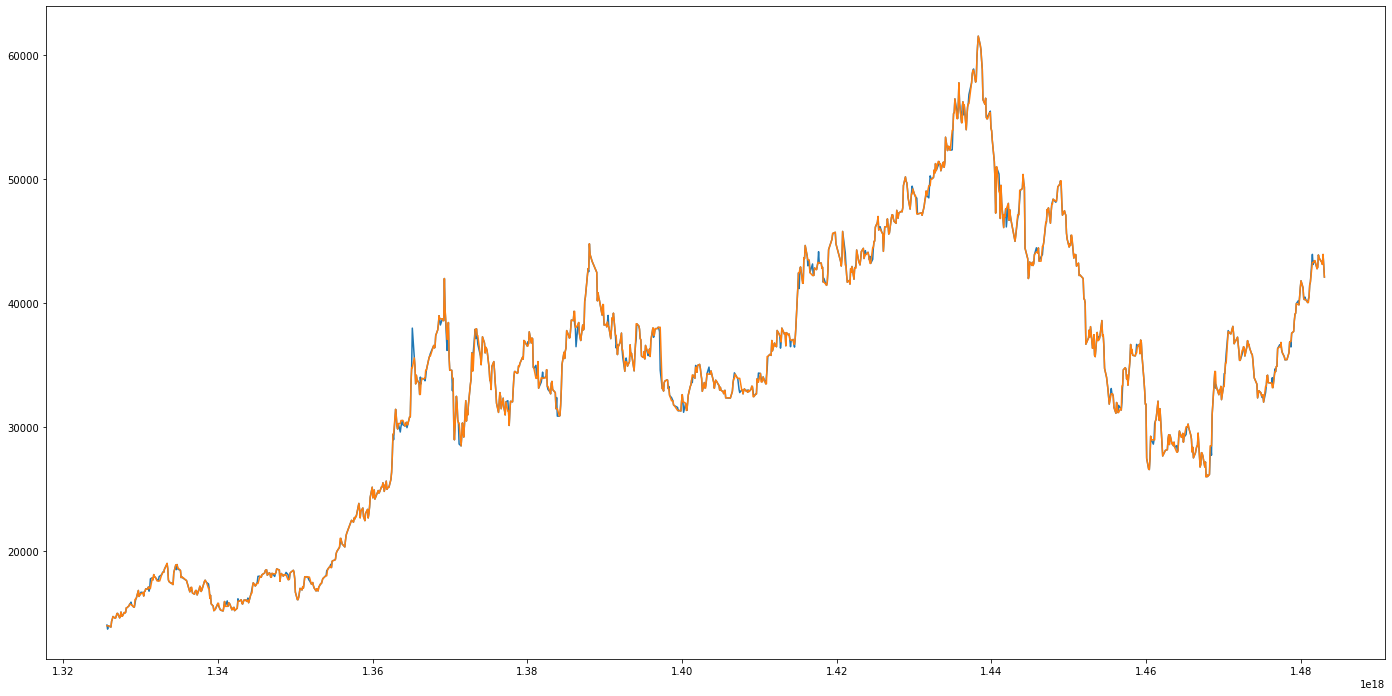

In [11]:
dates = ["2018-10-08","2018-10-05", "2018-10-04", "2018-10-03", "2018-10-01"]
for dt in dates:
  datetime_object = datetime.strptime(dt, "%Y-%m-%d")
  timestamp = datetime.timestamp(datetime_object)
  np.append(X, int(timestamp))

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor()

model.fit(X_train, Y_train)

predictions = model.predict(X)
 
print(mean_squared_error(Y, predictions))

fig=plt.figure(figsize=(24,12))
plt.plot(X,Y)
plt.plot(X,predictions)
plt.show()